In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df_train = pd.read_csv('house_train_raw.csv')

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.corr()["SalePrice"][df_train.corr().SalePrice > 0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [6]:
df_corr = df_train[["SalePrice","OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]]

In [7]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   YearBuilt     1460 non-null   int64
 3   YearRemodAdd  1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   1stFlrSF      1460 non-null   int64
 6   GrLivArea     1460 non-null   int64
 7   FullBath      1460 non-null   int64
 8   TotRmsAbvGrd  1460 non-null   int64
 9   GarageCars    1460 non-null   int64
 10  GarageArea    1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


<AxesSubplot:>

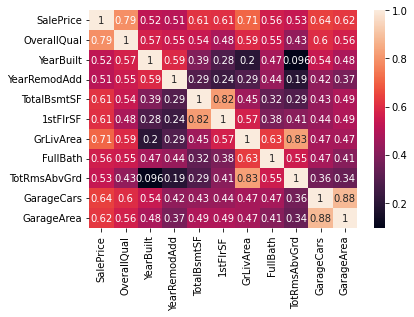

In [8]:
sns.heatmap(df_corr.corr(), annot=True)

In [9]:
px.box(df_train, x="OverallQual", y="SalePrice", color="OverallQual")

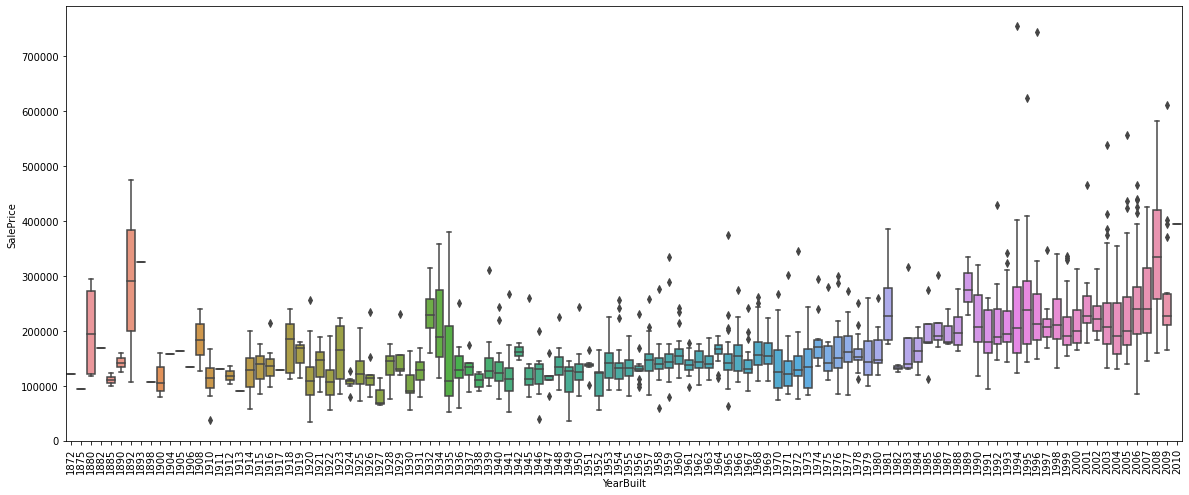

In [10]:
f, ax= plt.subplots(figsize=(20,8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df_train)
plt.xticks(rotation=90)
plt.show()

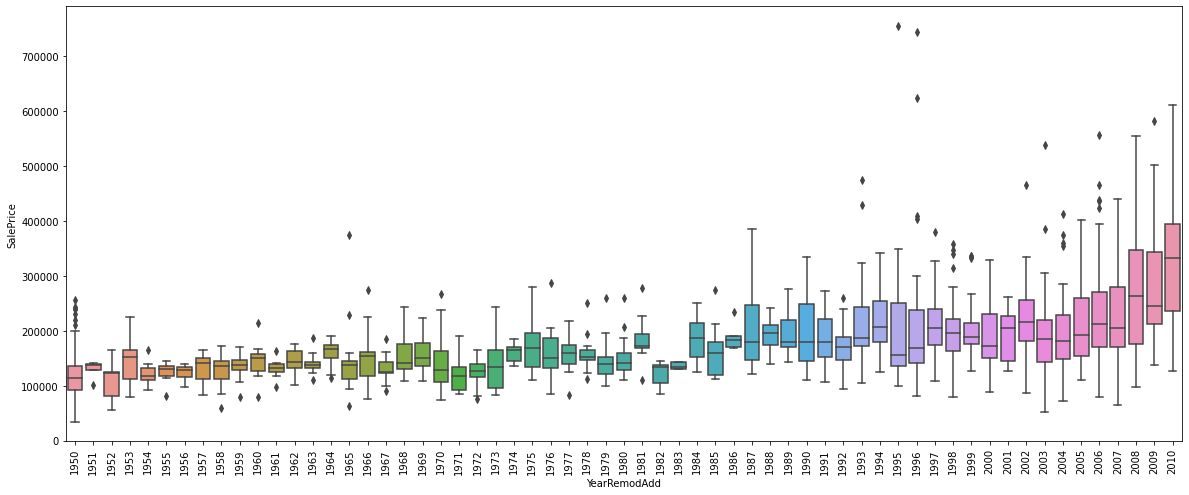

In [11]:
f, ax= plt.subplots(figsize=(20,8))
fig = sns.boxplot(x="YearRemodAdd", y="SalePrice", data=df_train)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

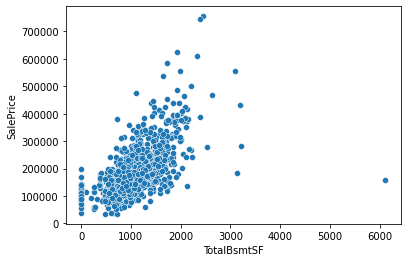

In [12]:
sns.scatterplot(y="SalePrice", x="TotalBsmtSF", data=df_train)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

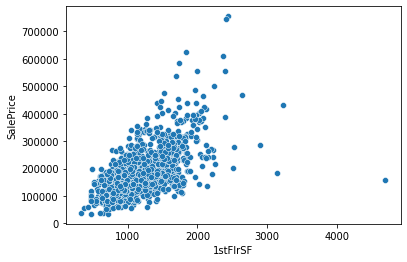

In [13]:
sns.scatterplot(y="SalePrice", x="1stFlrSF", data=df_train)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

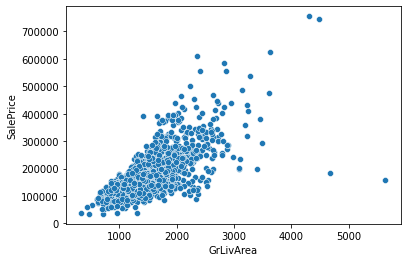

In [14]:
sns.scatterplot(y="SalePrice", x="GrLivArea", data=df_train)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

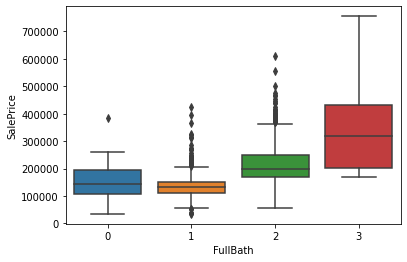

In [18]:
sns.boxplot(y="SalePrice", x="FullBath", data=df_train)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

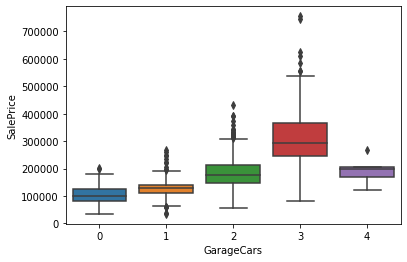

In [20]:
sns.boxplot(y="SalePrice", x="GarageCars", data=df_train)

In [23]:
px.scatter(df_train,y="SalePrice", x="GarageArea")

In [25]:
px.box(df_train,y="SalePrice", x="TotRmsAbvGrd")